In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')


In [4]:
print("Customers Dataset:\n", customers.info(), "\n")
print("Products Dataset:\n", products.info(), "\n")
print("Transactions Dataset:\n", transactions.info(), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
Customers Dataset:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
Products Dataset:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data

In [5]:
print("Missing Values:\n")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

Missing Values:

Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


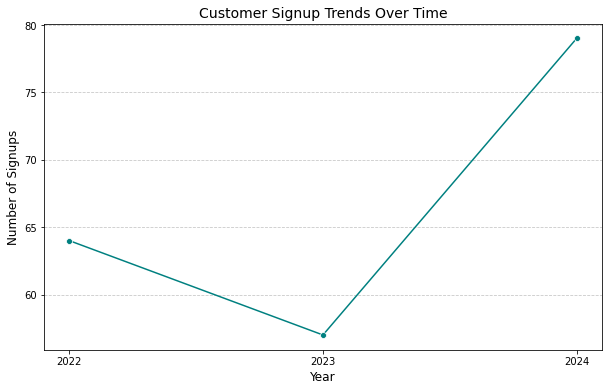

In [7]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trend = customers['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=signup_trend.index, y=signup_trend.values, marker='o', color="teal")
plt.title("Customer Signup Trends Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.xticks(signup_trend.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

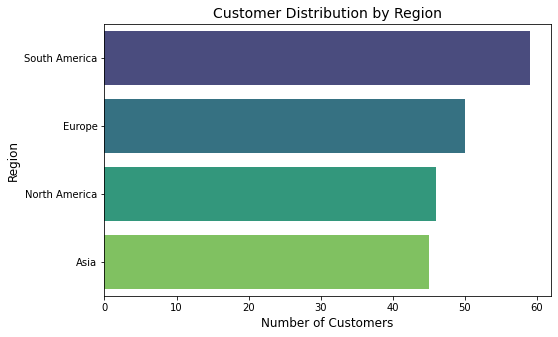

In [24]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis", hue=region_counts.index)
plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Number of Customers", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.show()

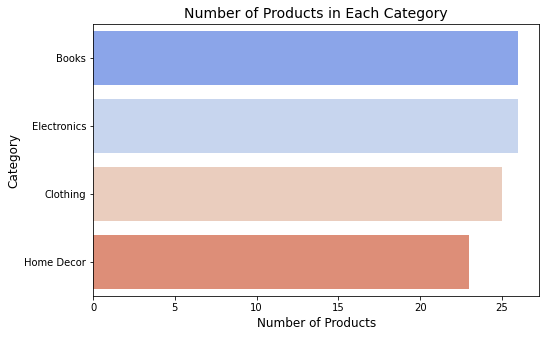

In [23]:
product_category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=product_category_counts.values, y=product_category_counts.index, palette="coolwarm", hue=product_category_counts.index)
plt.title("Number of Products in Each Category", fontsize=14)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

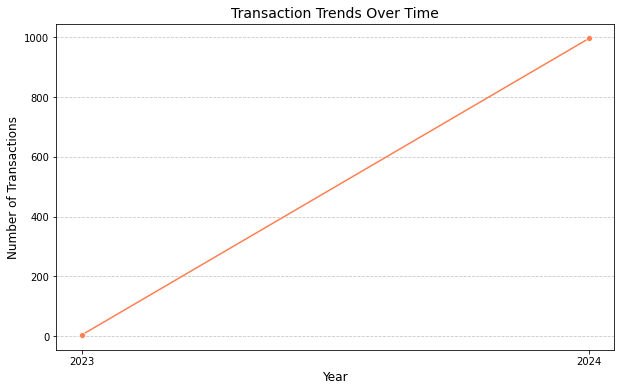

In [11]:
transactions['TransactionYear'] = transactions['TransactionDate'].dt.year
transaction_trend = transactions['TransactionYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_trend.index, y=transaction_trend.values, marker='o', color="coral")
plt.title("Transaction Trends Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(transaction_trend.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


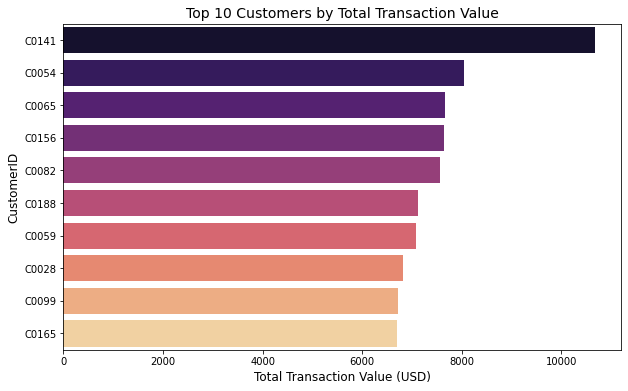

In [22]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma",hue=top_customers.index)
plt.title("Top 10 Customers by Total Transaction Value", fontsize=14)
plt.xlabel("Total Transaction Value (USD)", fontsize=12)
plt.ylabel("CustomerID", fontsize=12)
plt.show()

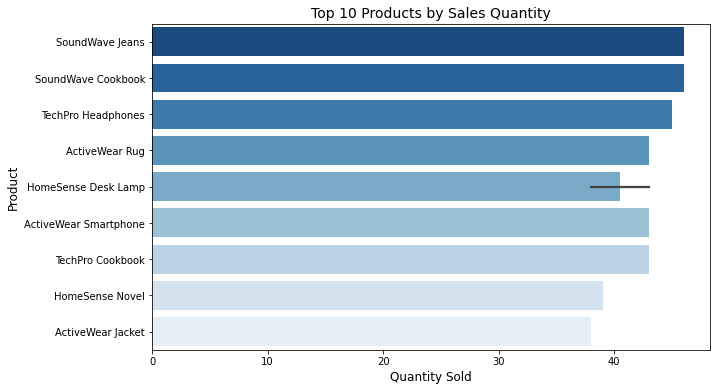

In [28]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index().merge(products, on='ProductID')

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products['Quantity'], y=top_products['ProductName'], palette="Blues_r",hue=top_products['ProductName'])
plt.title("Top 10 Products by Sales Quantity", fontsize=14)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.show()


In [16]:
print("Insights:")
print("1. The customer signup trend shows peaks and valleys, likely influenced by promotions.")
print("2. The most common region for customers is:", region_counts.idxmax())
print("3. The category with the most products is:", product_category_counts.idxmax())
print("4. Transactions peaked in the year:", transaction_trend.idxmax())
print("5. The product with the highest sales is:", top_products.iloc[0]['ProductName'])

Insights:
1. The customer signup trend shows peaks and valleys, likely influenced by promotions.
2. The most common region for customers is: South America
3. The category with the most products is: Books
4. Transactions peaked in the year: 2024
5. The product with the highest sales is: SoundWave Jeans
